**Business Understanding **

* Main Goal: Predicting whether or not the patients having diabetes
* Objective: Build a model based on using DT.

In [ ]:
# Loading needed libraries
import pandas as pd #import pandas to read the data into data frame 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print ('all done')

all done


**You can download the data from the link below** [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [ ]:
#readling the dataset

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names) #reading the dataset and adding the name of the columns

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split dataset in independent variables and dependent (target) feature
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # independent variable
y = pima.label # dependent variable

In [ ]:
# Splitting ting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier() #clf stands for classifier

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train) 

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Checking the accuracy by comparing the predicted result to the actual result
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


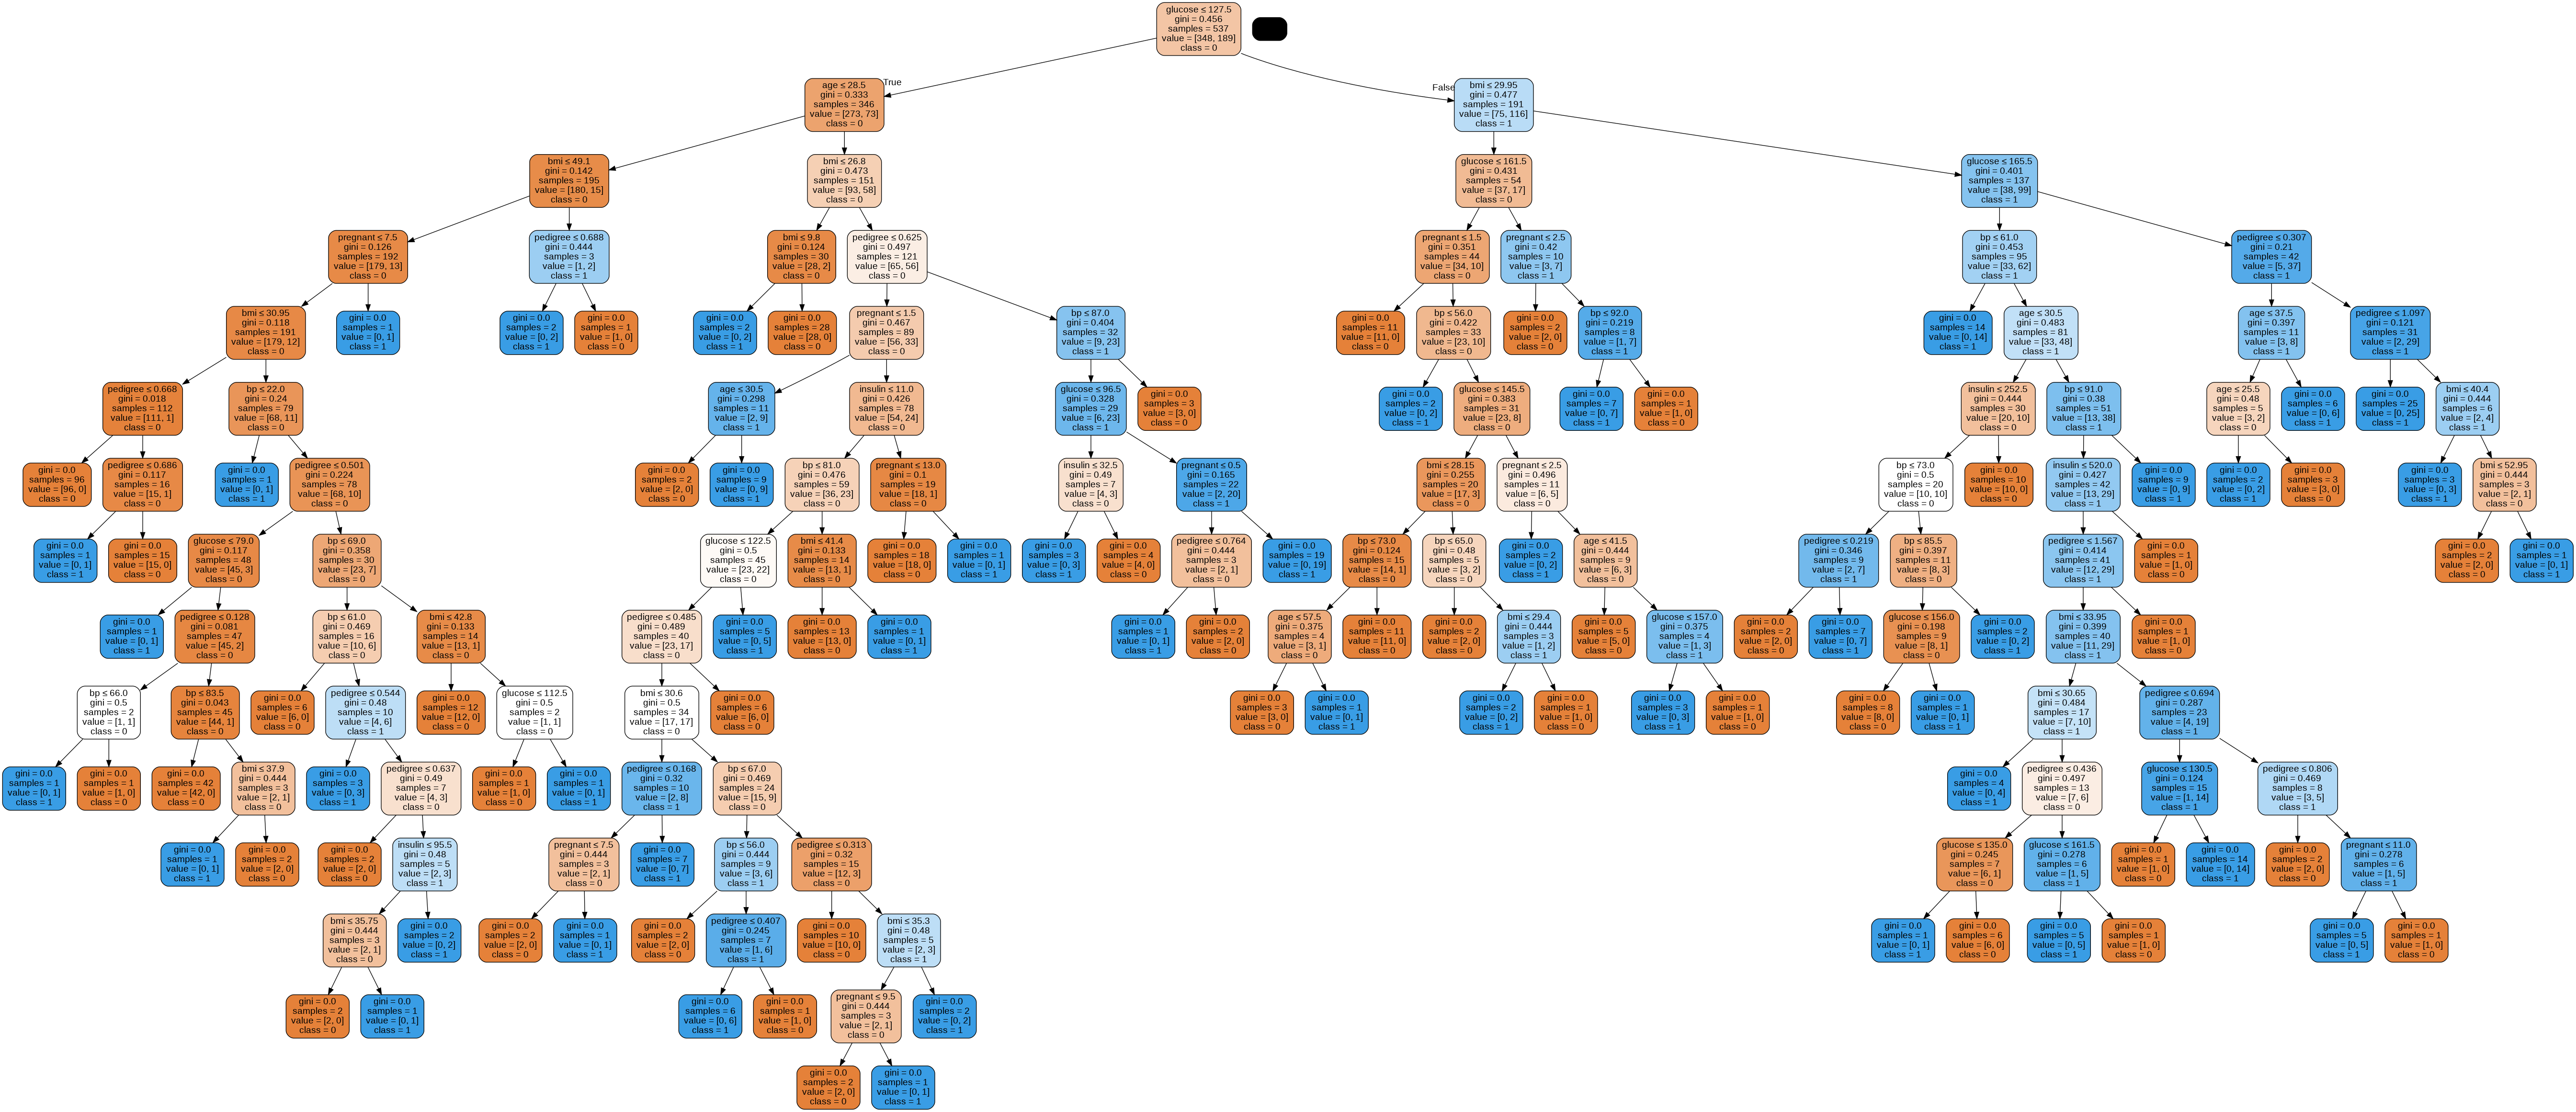

In [ ]:
# Data visualization 

!pip install graphviz
!pip install pydotplus
!pip install --upgrade scikit-learn==0.20.3


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())